In [92]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [93]:
def sort_data(df):
    df_result = pd.DataFrame(columns=['Type', 'FD_Algorithm', 'Nodes_Number', 'Degree', 'CCL_Grana_Time', 'CCL_Wu_Time','CT_Time'])
    for filename in df['ccl_grana_filename']:
        new_name = filename.replace("..\\ccl_data\\jpg_files\\","")
        name_list = new_name.split('\\')
        prop_list = name_list[2].split('=')
        node_number = prop_list[1].replace('d','')
        degree = prop_list[2].split("_")[0]
        ccl_grana = df.loc[df['ccl_grana_filename'] == filename, 'ccl_grana_processing_time(ms)'].values[0]
        ccl_wu = df.loc[df['ccl_grana_filename'] == filename, 'ccl_wu_processing_time(ms)'].values[0]
        ct = df.loc[df['ccl_grana_filename'] == filename, 'findContours_processing_time(ms)'].values[0]
        df_result.loc[len(df_result.index)] = [name_list[0], name_list[1], node_number, degree, ccl_grana, ccl_wu, ct]
    return df_result


# 生成x轴nodes_number的数据

In [100]:
def draw_bar(_type, d, fd, grana, wu, ct, size=4, total_width=0.6, n=2):
    target_path = "..//Excel2Graph//bar"
    nodes_number_value = [500, 1000, 2000, 3000]
    x=np.arange(4)#柱状图在横坐标上的位置
    width = total_width / n
    x = x - (total_width - width) / 2
    fname = "Type="+_type+"_d="+str(d)+"_FD="+fd+".pdf"
    plt.bar(x, grana,  width=width, label='ccl_grana')
    plt.bar(x+width, wu, width=width, label='ccl_wu')
    plt.bar(x+width*2, ct, width=width, label='ct')
    plt.legend()
    plt.xticks(x+total_width/2,nodes_number_value)#显示x坐标轴的标签,即tick_label,调整位置，使其落在两个直方图中间位置
    plt.title("Type="+_type+", degree="+str(d)+", FD algorithm="+fd)
    plt.savefig(os.path.join(target_path, fname), bbox_inches='tight') # 保存成PDF放大后不失真（默认保存在了当前文件夹下）
    plt.xlabel('Number of Nodes')
    plt.ylabel('Processing Time(ms)')
    plt.show()

In [101]:
def time_bar_generate(sorted_df, _type, degree, FD_list):
    nodes_number_list = [500, 1000, 2000, 3000]
#     FD_list = ["DH","FA2","FDGE","FR","FRR","FRU","JIGGLE","KK","KK_W","LINLOG"]
    for fd in FD_list:
        print(fd)
        ccl_grana_list = []
        ccl_wu_list = []
        ct_list = []
        for number in nodes_number_list:
            ccl_grana_list.append(sorted_df.loc[(sorted_df['FD_Algorithm'] == fd) & (sorted_df['Degree'] == str(degree)) & (sorted_df['Nodes_Number'] == str(number)) & (sorted_df['Type'] == _type), 'CCL_Grana_Time'].values[0])
            ccl_wu_list.append(sorted_df.loc[(sorted_df['FD_Algorithm'] == fd) & (sorted_df['Degree'] == str(degree)) & (sorted_df['Nodes_Number'] == str(number)) & (sorted_df['Type'] == _type), 'CCL_Wu_Time'].values[0])
            ct_list.append(sorted_df.loc[(sorted_df['FD_Algorithm'] == fd) & (sorted_df['Degree'] == str(degree)) & (sorted_df['Nodes_Number'] == str(number)) & (sorted_df['Type'] == _type), 'CT_Time'].values[0])
        print(ccl_grana_list)
        draw_bar(_type, degree, fd, ccl_grana_list, ccl_wu_list, ct_list)

# 1. 生成x轴为nodes_number，y轴为运行时间的柱状图

DH
[35905, 169545, 448800, 1030246]


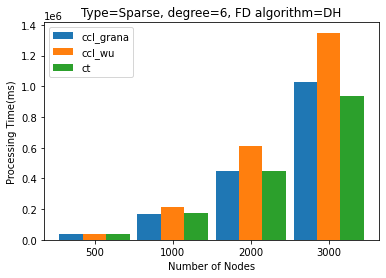

FA2
[81718, 185745, 607005, 1363653]


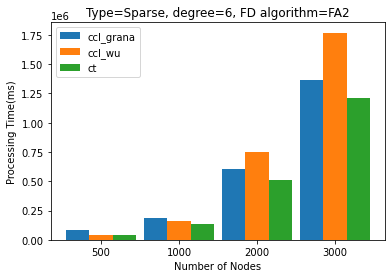

FDGE
[100018, 197708, 947367, 1391663]


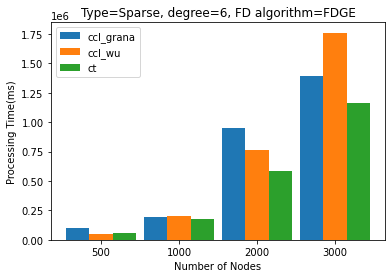

FR
[1075158, 190614, 631789, 1370362]


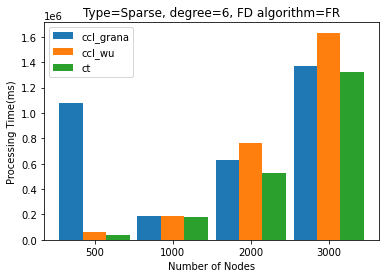

FRR
[156419, 1839860, 2126542, 2942615]


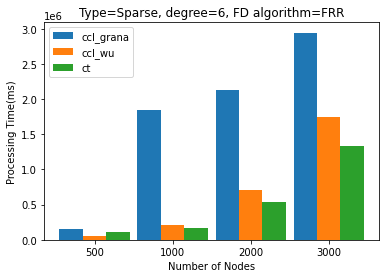

FRU
[49019, 147698, 559550, 1127676]


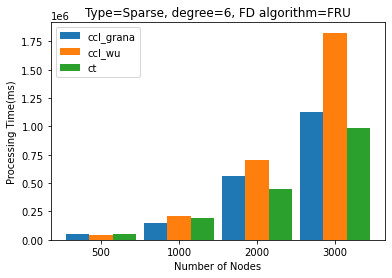

JIGGLE
[57274, 145645, 514699, 1332408]


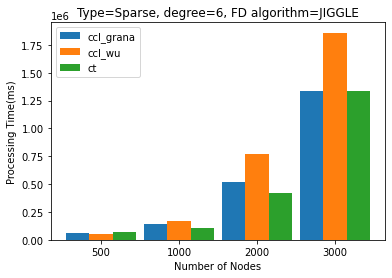

KK
[53410, 161875, 559816, 1074586]


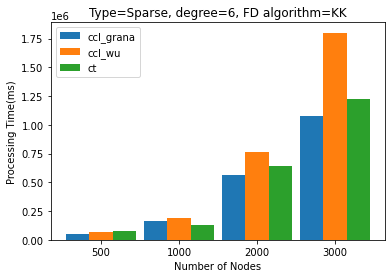

KK_W
[72199, 235755, 522779, 1374312]


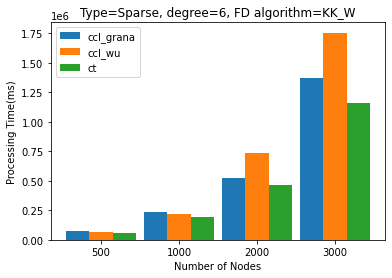

In [102]:
source_path = "../../Time"
file_name = "time.csv"
df = pd.read_csv(os.path.join(source_path, file_name))
# FD_list = ["DH","FA2","FRU"]
FD_list = ["DH","FA2","FDGE","FR","FRR","FRU","JIGGLE","KK","KK_W"]

sorted_df = sort_data(df)
time_bar_generate(sorted_df, "Sparse", 6, FD_list)
